## Observations and Insights 

* Capomulin out-performed all other drug regimens in the number of mice surviving to the end of the study. At the 45-day timepoint, 84% of mice on Capomulin (21 of 25) were still alive. Ramicane was a close second, with 80% of mice (20 of 25) surviving to the end of the study.
* Most mice on Capomulin saw a decline in tumor volume over the 45-day study, however there was wide variance in final tumor volume and some mice saw an increase in tumor volume over the study period.
* For mice on Capomulin, there is a strong positive correlation between the weight of the mouse and the average volume of the tumor.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# mouse_metadata.head()
# study_results.head()

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame - should be 249.
mice = merged_df["Timepoint"].value_counts()[0]
print(f"There are {mice} mice.")

There are 250 mice.


In [3]:
# identify the duplicated mouse 
duplicates = merged_df[merged_df.duplicated()]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = merged_df.loc[merged_df["Mouse ID"]=="g989"]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_names = merged_df[merged_df["Mouse ID"]=="g989"].index
cleaned_df = merged_df.drop(index_names)
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Check the number of mice in the clean DataFrame.
mouse_count = cleaned_df["Timepoint"].value_counts()[0]
print(f"There are {mouse_count} mice in the final data set.")

There are 248 mice in the final data set.


## Summary Statistics

In [7]:
# create array variables to hold values for mean, median, variance, standard deviation, and SEM of the tumor volume
regimens = cleaned_df["Drug Regimen"].unique()
means = []
medians = []
variances = []
st_devs = []
sems = []

# run a for loop to capture the summary statistic values for each of the drug regimens
for x in regimens:
    mean = round(cleaned_df.loc[cleaned_df["Drug Regimen"] == x, "Tumor Volume (mm3)"].mean(),2)
    median = round(cleaned_df.loc[cleaned_df["Drug Regimen"] == x, "Tumor Volume (mm3)"].median(),2)
    variance = round(cleaned_df.loc[cleaned_df["Drug Regimen"] == x, "Tumor Volume (mm3)"].var(),2)
    st_dev = round(cleaned_df.loc[cleaned_df["Drug Regimen"] == x, "Tumor Volume (mm3)"].std(),2)
    sem = round(cleaned_df.loc[cleaned_df["Drug Regimen"] == x, "Tumor Volume (mm3)"].sem(),2)
    means.append(mean)
    medians.append(median)
    variances.append(variance)
    st_devs.append(st_dev)
    sems.append(sem)

# print(regimens)
# print(means)
# print(medians)
# print(variances)
# print(st_devs)
# print(sems)

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = pd.DataFrame({
    "Regimen": regimens, 
    "Mean": means, 
    "Median": medians, 
    "Variance": variances, 
    "Standard Deviation": st_devs, 
    "SEM": sems
})
summary

,Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Ramicane,40.22,40.67,23.49,4.85,0.32
1,Capomulin,40.68,41.56,24.95,4.99,0.33
2,Infubinol,52.88,51.82,43.13,6.57,0.49
3,Placebo,54.03,52.29,61.17,7.82,0.58
4,Ceftamin,52.59,51.78,39.29,6.27,0.47
5,Stelasyn,54.23,52.43,59.45,7.71,0.57
6,Zoniferol,53.24,51.82,48.53,6.97,0.52
7,Ketapril,55.24,53.70,68.55,8.28,0.60
8,Propriva,52.32,50.45,43.85,6.62,0.54
9,Naftisol,54.33,52.51,66.17,8.13,0.60


## Bar Plots

In [9]:
# create variables to hold x- and y-axis data
drugs = cleaned_df["Drug Regimen"].unique()
timepoints = cleaned_df["Timepoint"].unique()
meds = []
times = []
mice_per_time = []

# create a for loop to count the number of mice at each time point for each drug
for drug in drugs:
    for x in timepoints:
        num_of_mice = len(cleaned_df.loc[(cleaned_df['Drug Regimen']==drug) & (cleaned_df['Timepoint']==x),['Mouse ID']])
        mice_per_time.append(num_of_mice)
        meds.append(drug)
        times.append(x)

# print(meds)
# print(times)
# print(mice_per_time)
# print(drugs)

In [10]:
# put the data that was generated in the above for loop into a data frame
mice_over_time = pd.DataFrame({
    "Timepoint (days)": times,
    "Drug Regimen": meds,
    "Number of Mice Remaining": mice_per_time 
})

# mice_over_time.head()

In [11]:
# use a pivot table to set up the data for plotting the bar chart in pandas
new_df = mice_over_time.pivot(index = "Timepoint (days)", columns = "Drug Regimen", values = "Number of Mice Remaining")
new_df

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint (days),,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17
25,22,18,18,19,18,17,13,23,18,16
30,22,16,17,18,15,15,12,23,17,15
35,22,14,12,17,15,14,9,21,15,14
40,21,14,10,15,15,12,9,20,12,14


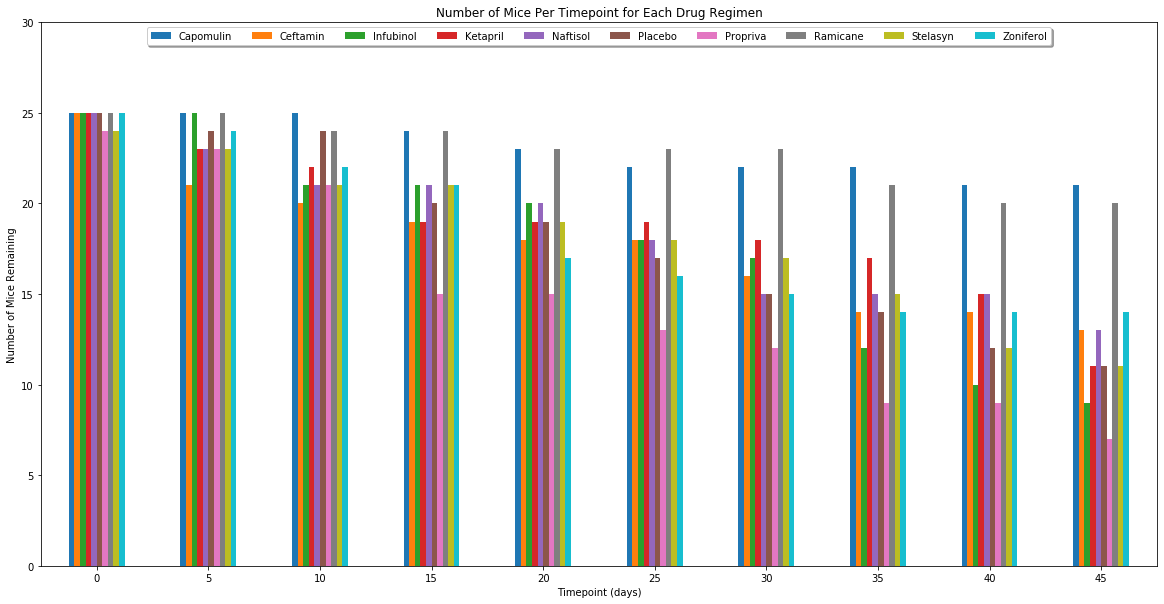

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
mice_time_plot = new_df.plot(kind="bar", rot=0, title='Number of Mice Per Timepoint for Each Drug Regimen', figsize=(20,10))
plt.ylabel("Number of Mice Remaining")
plt.ylim(0, max(mice_per_time)+5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), shadow=True, ncol=10)
mice_time_plot

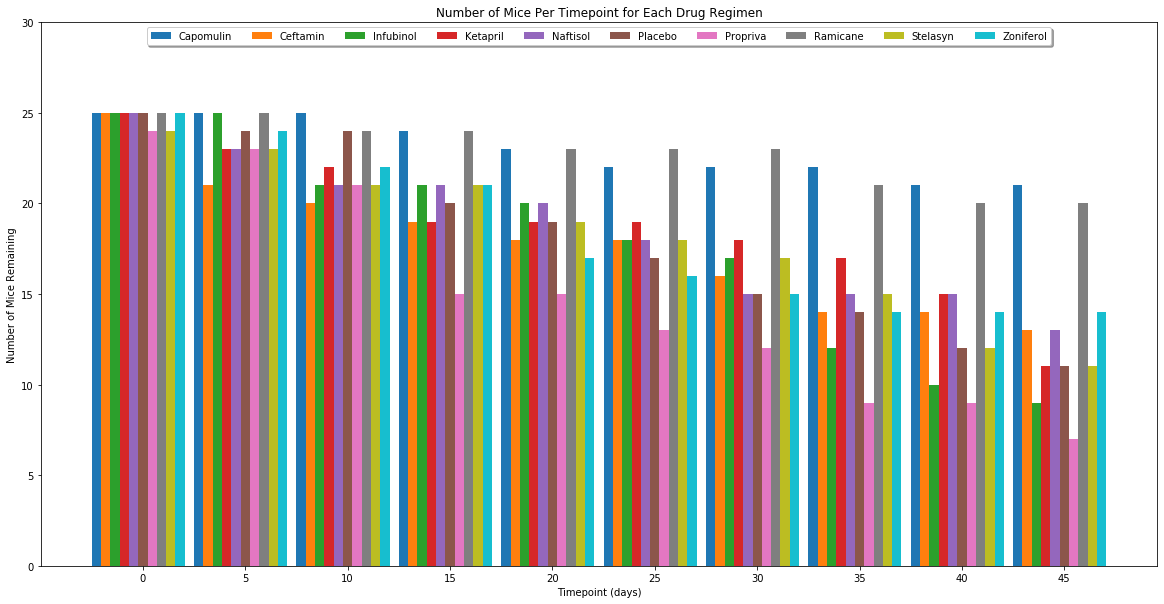

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using matplotlib. 
# assign each drug column of the above pivot table to a variable
capo = new_df["Capomulin"]
ceft = new_df["Ceftamin"]
infu = new_df["Infubinol"]
keta = new_df["Ketapril"]
naft = new_df["Naftisol"]
plac = new_df["Placebo"]
prop = new_df["Propriva"]
rami = new_df["Ramicane"]
stel = new_df["Stelasyn"]
zonf = new_df["Zoniferol"]

# set x-values equal to Timepoints
x_vals = new_df.index

# set y-values to each of the drug columns from pivot table
y_vals = [capo, ceft, infu, keta, naft, plac, prop, rami, stel, zonf]
labels = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

# set up bar plot
x_len = len(x_vals)
bin_width = 1/(x_len+1)

fig, ax = plt.subplots(figsize=(20,10))

for i in range(x_len):
    ax.bar(x=np.arange(len(x_vals)) + i*bin_width,
    height=y_vals[i],
    width=bin_width,
    align='center')
    
ax.set_xticks(np.arange(len(x_vals)) + x_len/(2*(x_len+1)))
ax.set_xticklabels(x_vals)
plt.title('Number of Mice Per Timepoint for Each Drug Regimen')
plt.xlabel("Timepoint (days)")
plt.ylabel("Number of Mice Remaining")
plt.ylim(0, max(mice_per_time)+5)
plt.legend(labels, loc='upper center', bbox_to_anchor=(0.5, 1.0), shadow=True, ncol=10)

plt.show()

## Pie Plots

In [14]:
# create variables to hold x- and y-axis data
sex = cleaned_df["Sex"].unique()
mice_per_sex = []

for x in sex:
    sex_count = cleaned_df["Sex"].value_counts()[x]
    mice_per_sex.append(sex_count)
    
# print(sex)
# print(mice_per_sex)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1704CBD88>],
      dtype=object)

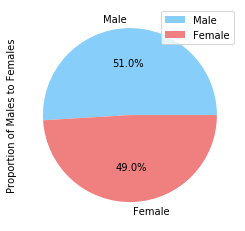

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# make a data frame out of the data
mouse_sex_df = pd.DataFrame(mice_per_sex, index = sex, columns=['Proportion of Males to Females'])
    
# create a bar chart of the data 
mouse_sex_plot = mouse_sex_df.plot(kind="pie", subplots=True, colors=["lightskyblue","lightcoral"], autopct='%1.1f%%')

mouse_sex_plot

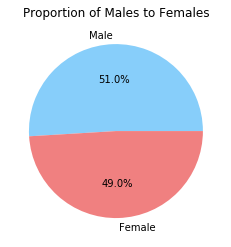

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_per_sex, colors=["lightskyblue","lightcoral"], labels=sex, autopct="%1.1f%%", startangle=0)
plt.title("Proportion of Males to Females")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin). 
top4 = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

capo_tumor = cleaned_df.loc[(cleaned_df["Timepoint"]==45) & (cleaned_df["Drug Regimen"]==top4[0])]['Tumor Volume (mm3)']
rami_tumor = cleaned_df.loc[(cleaned_df["Timepoint"]==45) & (cleaned_df["Drug Regimen"]==top4[1])]['Tumor Volume (mm3)']
infu_tumor = cleaned_df.loc[(cleaned_df["Timepoint"]==45) & (cleaned_df["Drug Regimen"]==top4[2])]['Tumor Volume (mm3)']
ceft_tumor = cleaned_df.loc[(cleaned_df["Timepoint"]==45) & (cleaned_df["Drug Regimen"]==top4[3])]['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capo_quartiles = capo_tumor.quantile([.25,.5,.75])
capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq-capo_lowerq
capo_lower_bound = capo_lowerq - (1.5*capo_iqr)
capo_upper_bound = capo_upperq + (1.5*capo_iqr)

rami_quartiles = rami_tumor.quantile([.25,.5,.75])
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq-rami_lowerq
rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)

infu_quartiles = infu_tumor.quantile([.25,.5,.75])
infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq-infu_lowerq
infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)

ceft_quartiles = ceft_tumor.quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)

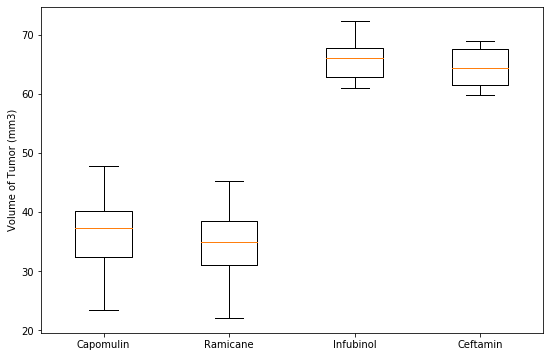

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data = [capo_tumor, rami_tumor, infu_tumor, ceft_tumor]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(plot_data)
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel("Volume of Tumor (mm3)")
plt.show()

## Line and Scatter Plots

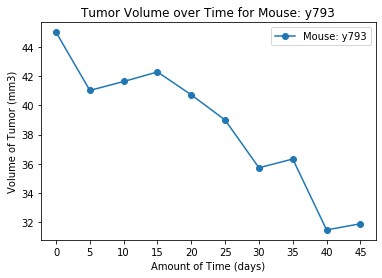

In [19]:
# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin
# Find the mice that were in the Capomulin condition
capo_mice = cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin']['Mouse ID'].unique()

# create a variable to hold all the possible timepoints
times = cleaned_df["Timepoint"].unique()

# identify the tumor volumes for one specific mouse on Capomulin over each timepoint
volumes = []
for x in times:
    vol = cleaned_df.loc[(cleaned_df["Mouse ID"]==capo_mice[5]) & (cleaned_df["Timepoint"]==x)]["Tumor Volume (mm3)"].values
    volumes.append(vol)
volume = np.concatenate(volumes,axis=0)

# plot everything on a line chart
plt.plot(times, volume, marker ='o', label = f"Mouse: {capo_mice[5]}")
plt.title(f"Tumor Volume over Time for Mouse: {capo_mice[5]}")
plt.xticks(times)
plt.legend()
plt.xlabel("Amount of Time (days)")
plt.ylabel("Volume of Tumor (mm3)")
plt.show()

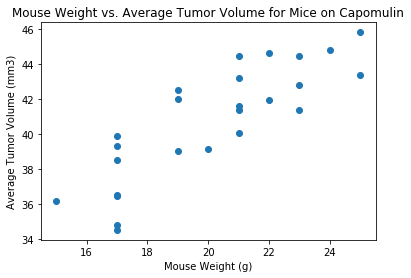

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# identify the weight of each mouse on Capomulin
weights = []
for mouse in capo_mice:
    w = cleaned_df.loc[(cleaned_df["Mouse ID"]== mouse) & (cleaned_df["Timepoint"]==0)]["Weight (g)"].values
    weights.append(w)
weight = np.concatenate(weights,axis=0)
# weight

# identify the average tumor volume for each mouse on Capomulin
avg_vols = []
for mouse in capo_mice:
    vols = []
    for x in times:
        v = cleaned_df.loc[(cleaned_df["Mouse ID"]==mouse) & (cleaned_df["Timepoint"]==x)]["Tumor Volume (mm3)"].values
        vols.append(v)
        all_vols = np.concatenate(vols,axis=0)
    #print(all_vols)
    avg = all_vols.mean()
    avg_vols.append(avg)
# avg_vols

# create the scatter plot out of the weights and average tumor volume
plt.scatter(weight, avg_vols, marker="o")
plt.title("Mouse Weight vs. Average Tumor Volume for Mice on Capomulin")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume is 0.84


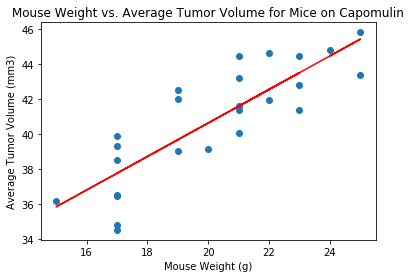

In [21]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_vols)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# calculate the correlation coefficient
correlation = st.pearsonr(weight, avg_vols)
print(f"The correlation between weight and average tumor volume is {round(correlation[0],2)}")

# Show the scatter plot and regression line of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(weight, avg_vols, marker="o")
plt.plot(weight,regress_values,"r-")
plt.title("Mouse Weight vs. Average Tumor Volume for Mice on Capomulin")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()